# Categorical features model

Here we attempt at using the categorical features in the dataset.
Eventually we only use a subset because of memory issues.
This model should eventually be combined with the
non-categorical features model.

In [1]:
from sklearn.feature_extraction import DictVectorizer, FeatureHasher
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import OneHotEncoder

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

%matplotlib inline

In [3]:
orders = pd.read_json(
    "../data/order_data_dtypes.json",
    orient='table',
)  # .sample(frac=.1, random_state=42).set_index('customer_id')

In [4]:
orders.shape

(786547, 15)

In [5]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 786547 entries, 0 to 786546
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_datetime       786547 non-null  datetime64[ns]
 1   customer_id          786547 non-null  object        
 2   customer_order_rank  786547 non-null  int64         
 3   is_failed            786547 non-null  bool          
 4   voucher_amount       786547 non-null  float64       
 5   delivery_fee         786547 non-null  float64       
 6   amount_paid          786547 non-null  float64       
 7   restaurant_id        786547 non-null  category      
 8   city_id              786547 non-null  category      
 9   payment_id           786547 non-null  category      
 10  platform_id          786547 non-null  category      
 11  transmission_id      786547 non-null  category      
 12  hour_of_day          786547 non-null  category      
 13  day_of_week   

In [6]:
group_by_cid = orders.groupby('customer_id')

In [7]:
categorical_columns = ['restaurant_id',
       'city_id', 'payment_id', 'platform_id', 'transmission_id',
       'hour_of_day', 'day_of_week']
categorical_columns_miniset = [
#     'restaurant_id',
#        'city_id', 
    'payment_id', 'platform_id', 'transmission_id',
       'hour_of_day', 'day_of_week']
other_columns = ['order_datetime', 'customer_order_rank', 'is_failed',
       'voucher_amount', 'delivery_fee', 'amount_paid', 'is_holiday']
groupby_column = 'customer_id'

In [8]:
orders[categorical_columns].head()

,restaurant_id,city_id,payment_id,platform_id,transmission_id,hour_of_day,day_of_week
0,45243498,90633,1811,29815,4260,0,6
1,198543498,63456,1619,525,4324,0,6
2,32433498,90633,1779,30231,212,0,6
3,154743498,90633,1619,525,4324,1,6
4,60563498,90633,1619,30391,4324,2,6


In [9]:
enc = OneHotEncoder(handle_unknown='ignore')

In [10]:
enc.fit(orders[categorical_columns_miniset].to_numpy())

OneHotEncoder(handle_unknown='ignore')

In [11]:
enc.categories_

[array(['1491', '1523', '1619', '1779', '1811'], dtype=object),
 array(['22167', '22263', '22295', '29463', '29495', '29751', '29815',
        '30135', '30199', '30231', '30359', '30391', '30423', '525'],
       dtype=object),
 array(['1988', '2020', '21124', '212', '4196', '4228', '4260', '4324',
        '4356', '4996'], dtype=object),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
        19, 20, 21, 22, 23], dtype=object),
 array([0, 1, 2, 3, 4, 5, 6], dtype=object)]

In [12]:
sparse_cat_miniset = pd.DataFrame(
    index=orders['customer_id'],
    data=enc.transform(orders[categorical_columns_miniset]).A,
#     dtype='Sparse',
)

In [13]:
cid_miniset = sparse_cat_miniset.groupby(sparse_cat_miniset.index).sum()

In [14]:
cid_miniset.head()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
customer_id,,,,,,,,,,,,,,,,,,,,,
000097eabfd9,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
0000e2c6d9be,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
000133bb597f,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
00018269939b,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
0001a00468a6,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [15]:
sparse_cat_miniset.index.nunique()

245453

In [16]:
orders['customer_id'].nunique()

245453

In [17]:
orders[categorical_columns_miniset].index

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            786537, 786538, 786539, 786540, 786541, 786542, 786543, 786544,
            786545, 786546],
           dtype='int64', length=786547)

"SVM, NaiveBayes and Logistics regression all support sparse matrix"

In [18]:
import numpy as np
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import auc, f1_score, confusion_matrix, roc_curve, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve

In [19]:
def plot_roc_auc_f1(true_labels, probability, title=None):
    # This is a convenience function that takes care of boring stuff
    f1 = f1_score(true_labels, probability[:, 1]>.5)
    fpr, tpr, _ = roc_curve(true_labels, probability[:, 1])
    auc_score = auc(fpr, tpr)
    fig, ax = plt.subplots(figsize=(6,6))
    if title is not None:
        ax.set_title(title)
    ax.plot([0, 1], [0, 1], '--', label="Random")
    ax.plot(fpr, tpr, label="Your model")
    ax.set_xlabel("False positive rate")
    ax.set_ylabel("True positive rate")
    ax.annotate(f"AUC: {auc_score:.4}", (.8, 0.15))
    ax.annotate(f"F1: {f1:.4}", (.8, 0.1))
    ax.legend()
    return f1, auc_score

In [20]:
labels = pd.read_csv("../data/machine_learning_challenge_labeled_data.csv.gz")

In [21]:
labels = cid_miniset.join(labels.set_index('customer_id'))['is_returning_customer']  # cid_miniset

In [22]:
labels

customer_id
000097eabfd9    0
0000e2c6d9be    0
000133bb597f    1
00018269939b    0
0001a00468a6    0
               ..
fffd696eaedd    0
fffe9d5a8d41    1
ffff347c3cfa    1
ffff4519b52d    0
ffffccbfc8a4    0
Name: is_returning_customer, Length: 245453, dtype: int64

In [23]:
features_plus_labels = cid_miniset.join(labels)

In [24]:
features_plus_labels.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,is_returning_customer
customer_id,,,,,,,,,,,,,,,,,,,,,
000097eabfd9,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
0000e2c6d9be,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
000133bb597f,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
00018269939b,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
0001a00468a6,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0


### Balance classes

In [25]:
labels.value_counts()

0    189948
1     55505
Name: is_returning_customer, dtype: int64

In [26]:
data_negative = features_plus_labels.loc[labels==0].sample(
    n=(labels==1).sum(),
    random_state=42,
)

In [27]:
data_positive = features_plus_labels.loc[labels==1]

In [28]:
data_negative.shape, data_positive.shape

((55505, 61), (55505, 61))

In [29]:
balanced_data = pd.concat((data_positive, data_negative))

In [30]:
balanced_data['is_returning_customer'].mean()

0.5

In [31]:
balanced_data

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,is_returning_customer
customer_id,,,,,,,,,,,,,,,,,,,,,
000133bb597f,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
0001e1e04d7d,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,1.0,1.0,2.0,0.0,2.0,0.0,1
0003647e5641,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
0004017c62e8,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,3.0,1
0004bae1b049,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8991a06d593d,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
da907979127c,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
c7d4e3ae98e1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0


In [32]:
train, test = train_test_split(
            balanced_data,
            train_size=.8,
            shuffle=True,
            stratify=balanced_data['is_returning_customer'].to_numpy(),
            random_state=42,
        )

In [33]:
train['is_returning_customer'].mean(), test['is_returning_customer'].mean()

(0.5, 0.5)

In [34]:
X = train.drop(columns=['is_returning_customer']).to_numpy()
X

array([[ 0.,  0., 17., ...,  2.,  1.,  2.],
       [ 0.,  0.,  2., ...,  1.,  1.,  0.],
       [ 0.,  0.,  0., ...,  1.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  3., ...,  1.,  0.,  1.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.]])

In [35]:
y = train['is_returning_customer'].to_numpy()

In [36]:
nb = MultinomialNB()

In [37]:
logreg = LogisticRegression(n_jobs=-1, verbose=3)

In [38]:
pipe = Pipeline(
    steps=[('classifier', nb)]
)

In [39]:
param_grid = [
    {'classifier': [nb], 'classifier__alpha': [.1, .3, .6, 1]},
    {'classifier': [logreg], 'classifier__C': np.logspace(-7, 0, 7)},
]

In [40]:
search = GridSearchCV(pipe, param_grid, cv=5, scoring='roc_auc', n_jobs=-1, verbose=3)

In [41]:
search.fit(X, y)

Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  48 out of  55 | elapsed:    5.9s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done  55 out of  55 | elapsed:    7.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    2.2s finished


GridSearchCV(cv=5, estimator=Pipeline(steps=[('classifier', MultinomialNB())]),
             n_jobs=-1,
             param_grid=[{'classifier': [MultinomialNB()],
                          'classifier__alpha': [0.1, 0.3, 0.6, 1]},
                         {'classifier': [LogisticRegression(C=0.00031622776601683794,
                                                            n_jobs=-1,
                                                            verbose=3)],
                          'classifier__C': array([1.00000000e-07, 1.46779927e-06, 2.15443469e-05, 3.16227766e-04,
       4.64158883e-03, 6.81292069e-02, 1.00000000e+00])}],
             scoring='roc_auc', verbose=3)

In [42]:
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Best parameter (CV score=0.759):
{'classifier': LogisticRegression(C=0.00031622776601683794, n_jobs=-1, verbose=3), 'classifier__C': 0.00031622776601683794}


In [43]:
search.cv_results_

{'mean_fit_time': array([0.04402537, 0.04324946, 0.05644059, 0.04979496, 0.26356978,
        0.26895952, 0.30615702, 0.44606667, 0.98826036, 1.42795539,
        1.31616936]),
 'std_fit_time': array([0.00282184, 0.00143242, 0.02257878, 0.01766283, 0.0228488 ,
        0.02480883, 0.04270746, 0.02567014, 0.06419281, 0.11155468,
        0.1200775 ]),
 'mean_score_time': array([0.01081872, 0.01122274, 0.01087208, 0.01613703, 0.00834208,
        0.00864224, 0.01027546, 0.00991726, 0.00944233, 0.00796289,
        0.00709929]),
 'std_score_time': array([0.00039703, 0.00139472, 0.00035135, 0.01030927, 0.00058114,
        0.00128006, 0.00403838, 0.00151594, 0.00127181, 0.00054585,
        0.00079687]),
 'param_classifier': masked_array(data=[MultinomialNB(), MultinomialNB(), MultinomialNB(),
                    MultinomialNB(),
                    LogisticRegression(C=0.00031622776601683794, n_jobs=-1, verbose=3),
                    LogisticRegression(C=0.00031622776601683794, n_jobs=-1, verbos

In [44]:
search.best_estimator_

Pipeline(steps=[('classifier',
                 LogisticRegression(C=0.00031622776601683794, n_jobs=-1,
                                    verbose=3))])

In [45]:
x_test = test.drop(columns=['is_returning_customer'])
y_test = test['is_returning_customer'].to_numpy()

In [46]:
y_proba = search.predict_proba(x_test)

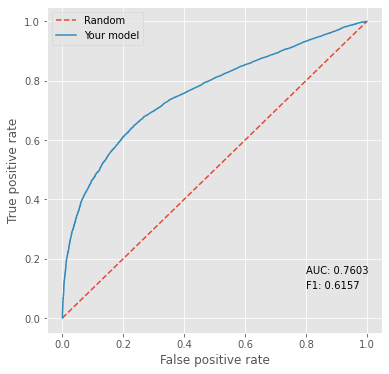

In [47]:
f1, auc_score = plot_roc_auc_f1(y_test, y_proba);

In [48]:
print(classification_report(y_test, search.predict(x_test)))

              precision    recall  f1-score   support

           0       0.64      0.88      0.74     11101
           1       0.80      0.50      0.62     11101

    accuracy                           0.69     22202
   macro avg       0.72      0.69      0.68     22202
weighted avg       0.72      0.69      0.68     22202



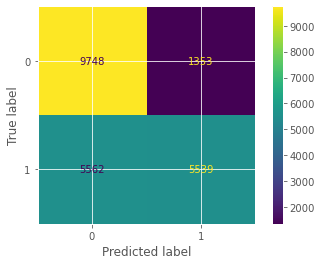

In [49]:
plot_confusion_matrix(search, x_test, y_test);

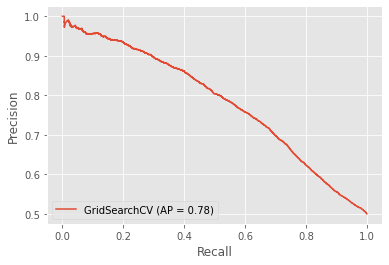

In [50]:
plot_precision_recall_curve(search, x_test, y_test)

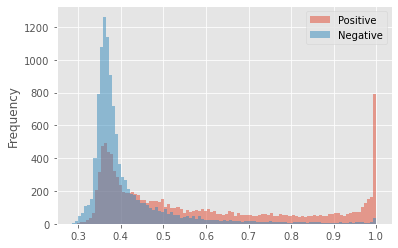

In [51]:
y_proba = search.predict_proba(x_test)
pd.Series(y_proba[:, 1]).loc[y_test>=.5].plot.hist(bins=99, alpha=.5, label='Positive')
pd.Series(y_proba[:, 1]).loc[y_test<.5].plot.hist(bins=99, alpha=.5, label='Negative')
plt.legend();